In [2]:
import os
os.chdir("..")
import pandas as pd

outcomes = pd.read_pickle("data/outcomes_concat.pkl")
stns = pd.read_pickle("data/stop_and_search_concat.pkl")
street = pd.read_pickle("data/street_concat.pkl")

In [40]:
highest_crime_outcome = street["Crime ID"].value_counts() > 1
stns.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')

In [41]:
import re
street.loc[~street["LSOA name"].isna(), "Borough"] = street["LSOA name"].dropna().apply(lambda x: re.split("[0-9]", x)[0].strip())
outcomes.loc[~outcomes["LSOA name"].isna(), "Borough"] = outcomes["LSOA name"].dropna().apply(lambda x: re.split("[0-9]", x)[0].strip())
print(street["Borough"].value_counts().head(32))

Borough
Westminster               1044277
Tower Hamlets              613361
Lambeth                    598397
Southwark                  578813
Newham                     574592
Camden                     565493
Croydon                    540663
Ealing                     528648
Hackney                    515077
Brent                      508332
Haringey                   483547
Barnet                     481208
Islington                  475936
Hillingdon                 464214
Enfield                    461455
Lewisham                   451411
Wandsworth                 435860
Waltham Forest             421144
Hounslow                   419311
Greenwich                  411717
Redbridge                  396532
Bromley                    380668
Hammersmith and Fulham     360896
Kensington and Chelsea     339569
Barking and Dagenham       318721
Havering                   300654
Harrow                     259856
Bexley                     255130
Merton                     235623
Sutton

In [ ]:
street["Falls within"].unique()

array(['Metropolitan Police Service'], dtype=object)

AttributeError: 'Series' object has no attribute 'todict'

In [39]:
street.count()

Crime ID                  9630501
Month                    14131200
Reported by              13581480
Falls within             14131200
Longitude                13968895
Latitude                 13968895
Location                 14131200
LSOA code                13968895
LSOA name                13968895
Crime type               14131200
Last outcome category     9569133
Context                         0
dtype: int64

In [ ]:
svc = street["Crime ID"].value_counts() 

In [13]:
high_perpetrator_crimes = set(svc[svc>2].index)

<Axes: xlabel='Month'>

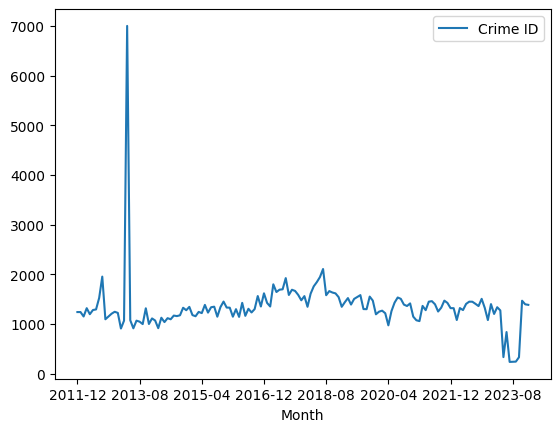

In [14]:
mask = street["Crime ID"].apply(lambda cid: cid in highest_crime_outcome)
street[mask].groupby("Month").count().plot(y="Crime ID")

In [15]:
stns.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,NaN,NaN
1,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN
2,Person search,2015-03-31T23:05:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),NaN,Offender given drugs possession warning,NaN,NaN
3,Person search,2015-03-31T23:09:00+00:00,NaN,NaN,NaN,NaN,Male,NaN,Not Stated (NS),Black,Misuse of Drugs Act 1971 (section 23),NaN,Nothing found - no further action,NaN,NaN
4,Person search,2015-03-31T23:15:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian or Asian British - Any other Asian ethni...,Asian,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN


In [16]:
street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.145949,51.593914,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
1,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [17]:
outcomes.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,6b1f92248fdd1da48149ecf656b26d697f643ca42b23a1...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.101143,51.372665,On or near SURREY STREET,E01001042,Croydon 024B,Offender fined
1,1babcc02dce29af22b4f3650e1e6f22c83a54cfdcfa372...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.068047,51.573901,On or near EGERTON ROAD,E01001826,Hackney 004E,Offender given community sentence
2,2a6625fb7b8ccab818be6b122f7d63b70b062e1aba09b4...,2012-01,Metropolitan Police Service,Metropolitan Police Service,0.214173,51.521207,On or near ORESTON ROAD,E01002344,Havering 029B,Offender given suspended prison sentence
3,6faae9efd06d209ecbba41705e764110ad6308ae75216e...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.068395,51.516984,On or near Conference/Exhibition Centre,E01004309,Tower Hamlets 015D,Offender sent to prison
4,5463dff8a94e52b8c9d992b1e2cc781836640376a6bab8...,2012-01,Metropolitan Police Service,Metropolitan Police Service,0.049091,51.489739,On or near LYFORD STREET,E01001706,Greenwich 005B,Offender given community sentence


In [29]:
asbs = street[street["Crime ID"].isna()]
non_asb = street[~street["Crime ID"].isna()]

In [30]:
asbs.count()

Crime ID                       0
Month                    4500699
Reported by              3950979
Falls within             4500699
Longitude                4499362
Latitude                 4499362
Location                 4500699
LSOA code                4499362
LSOA name                4499362
Crime type               4500699
Last outcome category          0
Context                        0
dtype: int64

In [31]:
non_asb.count()

Crime ID                 9630501
Month                    9630501
Reported by              9630501
Falls within             9630501
Longitude                9469533
Latitude                 9469533
Location                 9630501
LSOA code                9469533
LSOA name                9469533
Crime type               9630501
Last outcome category    9569133
Context                        0
dtype: int64

In [32]:
asbs.count() + non_asb.count() == street.count()

Crime ID                 True
Month                    True
Reported by              True
Falls within             True
Longitude                True
Latitude                 True
Location                 True
LSOA code                True
LSOA name                True
Crime type               True
Last outcome category    True
Context                  True
dtype: bool

In [33]:
street.groupby("LSOA name").count()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,Crime type,Last outcome category,Context
LSOA name,,,,,,,,,,,
Adur 001B,1,1,1,1,1,1,1,1,1,1,0
Adur 001C,1,1,1,1,1,1,1,1,1,1,0
Adur 001E,1,1,1,1,1,1,1,1,1,1,0
Adur 002A,1,1,1,1,1,1,1,1,1,1,0
Adur 003A,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
York 016E,1,1,1,1,1,1,1,1,1,1,0
York 017B,1,1,1,1,1,1,1,1,1,1,0
York 019D,1,1,1,1,1,1,1,1,1,1,0
